### 1. Deskripsi Masalah dan Tujuan

Tenggelamnya kapal Titanic adalah salah satu bangkai kapal paling terkenal dalam sejarah. Pada 15 April 1912, selama pelayaran perdananya, Titanic tenggelam setelah bertabrakan dengan gunung es, menewaskan 1502 dari 2224 penumpang dan awak. Tragedi mengerikan ini mengejutkan komunitas internasional dan menyebabkan peraturan keselamatan yang lebih baik untuk kapal.

Dalam masalah ini, diminta untuk menyelesaikan analisis tentang jenis penumpang yang mungkin bertahan dari tragedi menggunakan Machine Learning. Jadi tugas kita untuk memprediksi apakah seorang penumpang selamat dari Titanic yang tenggelam atau tidak dengan bantuan pembelajaran mesin. Jadi itu masalah klasifikasi biner.

### 2. Import packages dan data

In [3]:
import numpy as np               # Aljabar linear
import pandas as pd              # Manipulasi data
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns            # Visualisasi statistik
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

In [31]:
from IPython.display import Markdown, display
def bold(string):
    display(Markdown(string))

# Untuk manipulasi text

In [12]:
train = pd.read_csv("train.csv")
display(train.head(3))

test = pd.read_csv("test.csv")
display(test.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


*Di test data tidak ada kolom survived

### 3. Deskripsi dan identifikasi variabel

Jelaskan apa yang masing-masing variabel tunjukkan dan identifikasikan variabel respons dan prediktor kami. Kemudian memisahkan variabel kategori dari variabel numerik dan akhirnya mengidentifikasi tipe data panda (yaitu, objek, float64 atau int64) untuk setiap variabel.

#### 3.1 Deskrpisi variabel

In [14]:
'''Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.'''
merged = pd.concat([train, test], sort = False)
display(merged.head(2))

'''Shape of the combined data'''
display(merged.shape)

'''Variables in the combined data'''
display(merged.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


(1309, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Apa yang bisa kita lihat ??

Jadi kita memiliki total 12 variabel. Dan setiap variabel memiliki 1309 baris (tidak termasuk survived).

Di sinilah deskripsi semua variabel:

1. PassengerId adalah pengidentifikasi unik yang ditugaskan untuk setiap penumpang.
2. Survived adalah kondisi yang menunjukkan jika penumpang selamat (0 = Tidak, 1 = Ya).
3. Class adalah kelas penumpang (1 = kelas 1, 2 = kelas 2, 3 = kelas 3).
4. Name adalah nama penumpang.
5. Sex menunjukkan jenis kelamin penumpang (Pria atau wanita).
6. Age menunjukkan usia penumpang.
7. Sibsp adalah jumlah saudara kandung / pasangan di atas kapal.
8. Parch adalah jumlah orang tua / anak-anak di atas kapal.
9. Ticket menunjukkan nomor tiket yang dikeluarkan untuk penumpang.
10. Fare menunjukkan jumlah uang yang dikeluarkan untuk tiket mereka.
11. Cabin menunjukkan kabin yang ditempati oleh penumpang.
12. Embarked menunjukkan pelabuhan tempat penumpang berangkat (C = Cherbourg, Q = Queenstown, S = Southampton).

**Survived adalah variabel target dan sisanya dari variabel adalah variabel prediktor.**

#### 3.2 Variabel numerik dan kategori

Numerik : Fare, Age, and PassengerId.

Kategori : Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, SibSp, and Parch.

#### 3.3 Tipe data variabel

In [15]:
display(merged.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

data INT : PassengerId, Pclass, SibSp, Parch

data FLOAT: Survived, Age, Fare

data Objek(string+number): Name, Sex, Ticket, Cabin, Embarked

#### 4. Analisis Univariat

Analisis univariat secara terpisah mengeksplorasi distribusi setiap variabel dalam kumpulan data. Ini terlihat pada kisaran nilai, serta kecenderungan sentral dari nilai-nilai. Analisis data univariat tidak melihat hubungan antara berbagai variabel (seperti analisis bivariat dan multivariat) melainkan merangkum masing-masing variabel sendiri. Metode untuk melakukan analisis univariat akan tergantung pada apakah variabel itu kategorikal atau numerik. Untuk variabel numerik, kami akan mengeksplorasi bentuk distribusi (distribusi dapat simetris atau miring) menggunakan histogram dan plot kepadatan. Untuk variabel kategori, kami akan menggunakan bar plot untuk memvisualisasikan distribusi frekuensi absolut dan proporsional. Mengetahui distribusi nilai-nilai fitur menjadi penting ketika Anda menggunakan metode pembelajaran mesin yang menganggap jenis tertentu, paling sering Gaussian.

#### 4.1 Variabel Kategori

In [16]:
'''Untuk menganalisis variabel kategori, kami akan membuat tiga fungsi kustom.
Dua fungsi pertama menampilkan label bar dalam skala absolut dan relatif. Dan yang ketiga menciptakan dataframe absolut dan relatif dan juga menghasilkan abs dan frekuensi relatif plot untuk setiap variabel.'''

''' #1.Fungsi untuk menampilkan nilai absolut'''
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
    
'''#2.Fungsi untuk menampilkan level bar secara relatif'''
def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
         
'''#3.Fungsi untuk membuat dataframe frekuensi absolut dan relatif dari setiap variabel. Dan plot frekuensi absolut dan relatif.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)

##### 4.1.1 Survived

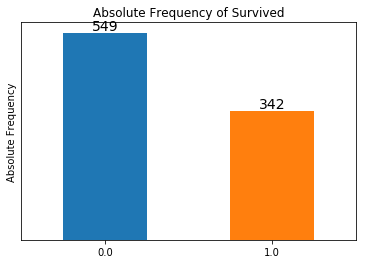

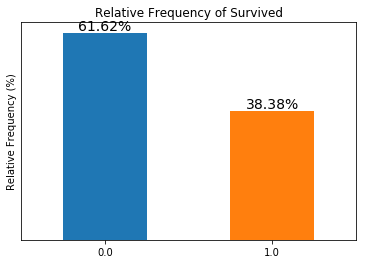

Absolute & Relative Frequency of Survived :


,Absolute Frequency,Relative Frequency(%)
0.0,549,61.62
1.0,342,38.38


In [34]:
absolute_and_relative_freq(merged.Survived)

##### 4.1.2 Sex

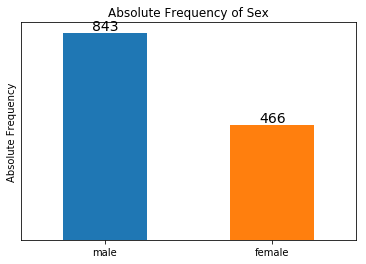

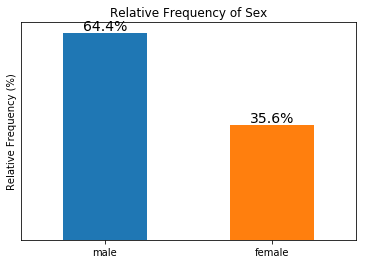

Absolute & Relative Frequency of Sex :


,Absolute Frequency,Relative Frequency(%)
male,843,64.4
female,466,35.6


In [20]:
absolute_and_relative_freq(merged.Sex)

##### 4.1.3 Pclass

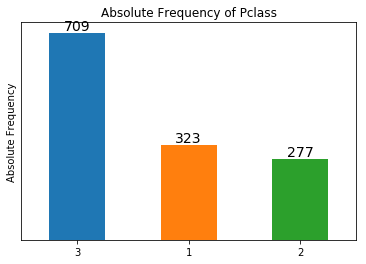

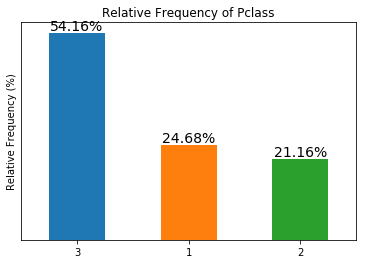

Absolute & Relative Frequency of Pclass :


,Absolute Frequency,Relative Frequency(%)
3,709,54.16
1,323,24.68
2,277,21.16


In [21]:
absolute_and_relative_freq(merged.Pclass)

##### 4.1.4 Embarked

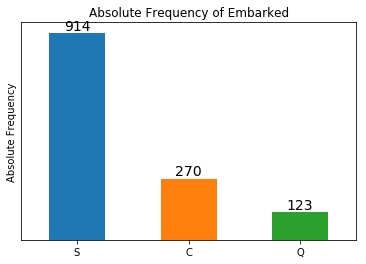

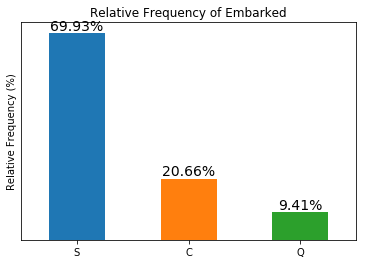

Absolute & Relative Frequency of Embarked :


,Absolute Frequency,Relative Frequency(%)
S,914,69.93
C,270,20.66
Q,123,9.41


In [35]:
absolute_and_relative_freq(merged.Embarked)

##### 4.1.5 Cabin

In [36]:
'''Absolute frequency of Cabin.'''
abs_freq_cabin = merged.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin.head())

"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold('**Total categories in Cabin:**')
display(abs_freq_cabin.count())

'''Finally preview the variable Cabin to see what is causing the irregularity.'''
bold('**Preview Cabin:**')
display(merged.Cabin.head(7))

**Categories of Cabin:**

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F4                    4
Name: Cabin, dtype: int64

**Total categories in Cabin:**

187

**Preview Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
Name: Cabin, dtype: object

**Temuan**: Sepertinya Cabin adalah jenis alfanumerik dengan 1014 obsevations yang hilang. Ada 187 jenis kategori dalam variabel Cabin. Karena ada terlalu banyak kategori di Cabin, kita harus memproses (yaitu, mengurangi jumlah kategori) Cabin untuk memeriksa apakah ada hubungan antara Survived dan Cabin.

##### 4.1.6 Name

In [37]:
'''Count total categories in Name.'''
bold('**Total categories in Name:**')
display(merged.Name.value_counts().count())

"""Let's finally check the what's inside the variable Name."""
bold('**Preview Name:**')
display(merged.Name.head())

**Total categories in Name:**

1307

**Preview Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**Temuan**: Seperti yang diharapkan Nama mengandung string yang memiliki 1307 variasi. Jadi, seperti Cabin, kita harus mengolah Name untuk mendapatkan petunjuk tentang bertahan hidup darinya.

##### 4.1.7 Ticket

In [38]:
'''Count total groups in variable Ticket.'''
bold('**Total groups in Ticket:**')
display(merged.Ticket.value_counts().count())

'''Lets investigate Ticket.'''
bold('**Preview of Ticket:**')
display(merged.Ticket.head())

**Total groups in Ticket:**

929

**Preview of Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Temuan**: Sepertinya Tiket juga memiliki terlalu banyak kategori unik (929). Sebagai variabel jenis alfanumerik, kami harus memproses Tiket untuk mendapatkan wawasan berguna tentang bertahan hidup.

##### 4.1.8 Sibsp

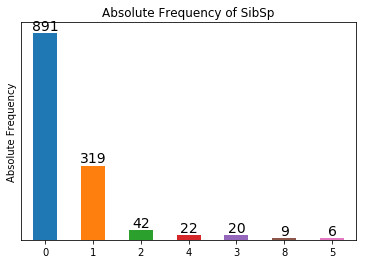

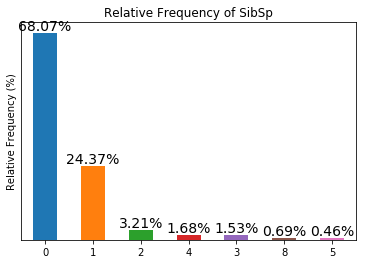

Absolute & Relative Frequency of SibSp :


,Absolute Frequency,Relative Frequency(%)
0,891,68.07
1,319,24.37
2,42,3.21
4,22,1.68
3,20,1.53
8,9,0.69
5,6,0.46


In [40]:
absolute_and_relative_freq(merged.SibSp)

##### 4.1.9 Parch

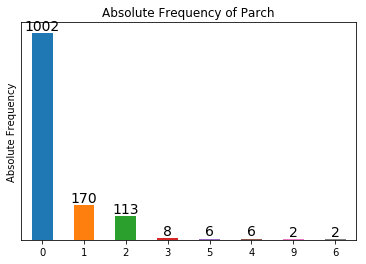

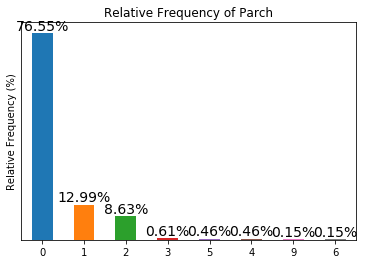

Absolute & Relative Frequency of Parch :


,Absolute Frequency,Relative Frequency(%)
0,1002,76.55
1,170,12.99
2,113,8.63
3,8,0.61
5,6,0.46
4,6,0.46
9,2,0.15
6,2,0.15


In [44]:
absolute_and_relative_freq(merged.Parch)

#### 4.2 Variabel Numerik

In [46]:
'''Untuk menganalisis variabel numerik, kita akan membuat dua fungsi kustom.
Yang pertama akan menghitung statistik ringkasan dan plot histogram untuk setiap variabel numerik.
Dan fungsi kedua akan memplot plot kepadatan kernel dan menghitung skewness untuk setiap variabel numerik.''' 

'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s with Histogram' %variable.name)
    abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness(kecondongan).'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s with Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)

##### 4.2.1 Fare

Summary Statistics of Fare :


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

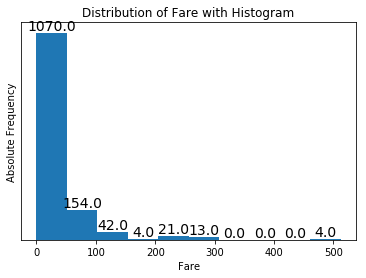

In [47]:
summary_stats_and_hist(merged.Fare)

**Dilihat dari histogram, jelas bahwa distribusi Fare memiliki kecondongan positif yang tinggi. Dan tampaknya sebagian besar penumpang (1070) membayar ongkos antara 0 hingga 51, diikuti oleh 51 hingga 102.**

Ada juga cara lain, yang sering lebih jelas, untuk memahami distribusi: plot kepadatan atau, lebih formal, Kernel Density Plots. Mereka dapat dianggap sebagai versi halus dari histogram. Salah satu keuntungan dari kepadatan plot selama histogram adalah bahwa bentuk distribusi tidak dipengaruhi oleh jumlah bins(kantong) yang digunakan.

Skewness of  Fare :


4.367709134122922

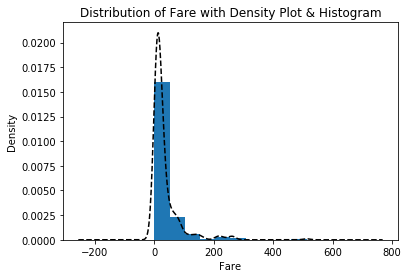

In [49]:
density_plot_and_skewness(merged.Fare)

**Jadi apa nilai yang Skewness(kecondongan) ditampilkan?**

1. Jika skewness kurang dari −1 atau lebih besar dari +1, distribusi dapat dianggap sangat condong.
2. Jika skewness antara −1 dan −½ atau antara + ½ dan +1, distribusi dapat dianggap sebagai lumayan condong.
3. Dan akhirnya jika skewness antara −½ dan + ½, distribusi dapat dianggap sebagai kira-kira simetris.

**Temuan**: Plot density menunjukkan massa distribusi Fare sangat terkonsentrasi di sebelah kiri gambar karena ekor yang sangat panjang di sisi kanan. Jadi dapat dikatakan bahwa Fare benar-benar condong (positif) yang juga didukung oleh nilai positif yang dihitung dari skewness 4.368

##### 4.2.2 Age

Summary Statistics of Age :


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

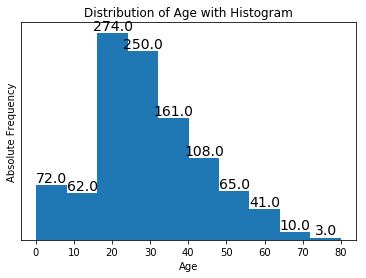

In [52]:
summary_stats_and_hist(merged.Age)

Skewness of  Age :


0.40767455974362266

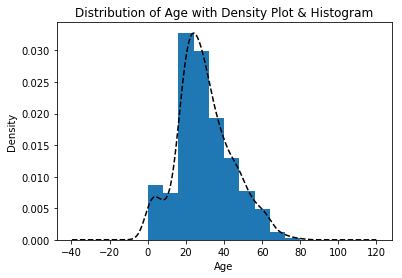

In [53]:
density_plot_and_skewness(merged.Age)

**Temuan**: Apa yang bisa kita lihat dari plot density adalah bahwa massa distribusi Age sedikit terkonsentrasi di sebelah kiri gambar karena ekor relatif panjang di sisi kanan. Jadi dapat dikatakan bahwa Age hampir terdistribusi normal karena ekor pada kedua sisi hampir sama dan memiliki nilai kecondongan positif yang kecil sebesar 0,40767 (antara -0,5 hingga 0,5). Jadi dapat dikatakan bahwa Age hampir terdistribusi secara normal.

##### 4.2.3 PassengerID

PassengerID hanya meliputi identitas dari penumpang

In [56]:
display(merged.PassengerId.head(10))

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

### 5. Manipulasi Feature

Di bagian ini, kami akan memodifikasi atau membuat fitur baru dari fitur-fitur yang sudah ada yang sulit dianalisis dalam bentuk mentah yang kami lihat di bagian Analisis Univariat. Kami akan merekayasa fitur seperti Cabin, Name, SibSp & Parch, dan Ticket yang dapat memberi tahu kami sesuatu tentang bertahan hidup atau mati setelah diproses.

#### 5.1 Cabin

In [57]:
"""Let's preview the Cabin again."""
bold('**Cabin preview:**')
display(merged.Cabin.head())

"""It seems Cabin contains some missing values. Let's count them."""
bold('**Missing values in Cabin:**')
display(merged.Cabin.isnull().sum())

'''Total categories in Cabin before processing.'''
bold('**Total categories in Cabin before processing:**')
display(merged.Cabin.value_counts(dropna = False).count())

**Cabin preview:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

**Missing values in Cabin:**

1014

**Total categories in Cabin before processing:**

187

Sepertinya Cabin adalah jenis alfanumerik tanpa karakter khusus (seperti., /,% Dll) antara huruf dan angka. Ini juga memiliki 1014 obsevations yang hilang. Masuk akal untuk mengasumsikan bahwa NaN tidak memiliki kabin, yang bisa memberi tahu kita sesuatu tentang 'Bertahan Hidup'. Kami akan menandai NaN sebagai 'X' dan hanya menyimpan karakter pertama di mana Cabin memiliki nilai alfanumerik. Karena variabel kategorinya, kita harus mengurangi jumlah kategori untuk analisis lebih lanjut.

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

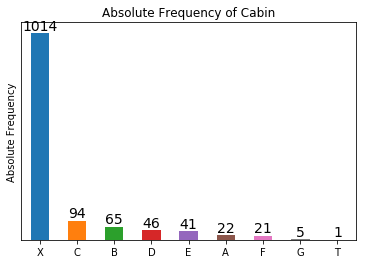

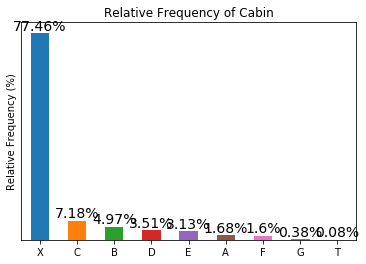

Absolute & Relative Frequency of Cabin :


,Absolute Frequency,Relative Frequency(%)
X,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [58]:
"""Flag all the NaNs of Cabin as 'X'."""
merged.Cabin.fillna(value = 'X', inplace = True)

'''Keep only the 1st character where Cabin is alphanumerical.'''
merged.Cabin = merged.Cabin.apply( lambda x : x[0])
display(merged.Cabin.value_counts())

'''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
absolute_and_relative_freq(merged.Cabin)

**Temuan**: Tampaknya hampir 77,5% penumpang memiliki kategori kabin X (sebelumnya NaNs), diikuti oleh lebih dari 7% memiliki kategori kabin C dan hampir 5% memiliki kategori kabin B.

#### 5.1.2 Name

In [59]:
display(merged.Name.head(10))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Apa yang dapat kita pahami dengan mudah dari kolom ini, berisi string yang lebih berisi judul seperti Mr, Mrs, Master, dll. Titel ini memberi kita beberapa informasi berguna tentang seks (Mr = laki-laki, Nyonya = wanita yang sudah menikah), usia (Ms biasanya lebih muda dari Mrs), dan profesi (Master menunjukkan profesi dan karenanya status sosial) dll yang pada akhirnya dapat memberi tahu kita sesuatu yang lebih tentang bertahan hidup. Sekarang kami ingin mengekstrak judul-judul ini dari Nama untuk memeriksa apakah ada hubungan antara Titel ini dan Survived.

In [60]:
'''Create a new variable Title that extracts titles from Name.'''
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')

'''Count the extracted categories of Title from Name.'''
display(merged.Title.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Capt          1
Countess      1
Don           1
Dona          1
Sir           1
Jonkheer      1
Lady          1
Mme           1
Name: Title, dtype: int64

Kita bisa melihat ada beberapa Titel dengan frekuensi paling sedikit. Jadi, masuk akal untuk menempatkan mereka dalam lebih sedikit kantong. Profesional seperti Dr, Rev, Col, Mayor, Capt akan dimasukkan ke dalam ember 'officer'. Titel seperti Dona, Jonkheer, Countess, Sir, Lady, Don biasanya berhak atas kaum bangsawan dan karenanya Titel ini akan dimasukkan ke dalam ember 'Aristokrat'. Kami juga akan menggantikan Mlle dan Ms dengan Miss dan Mme oleh Mrs karena ini adalah titel dalam bahasa Prancis.

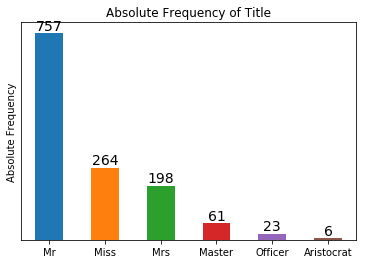

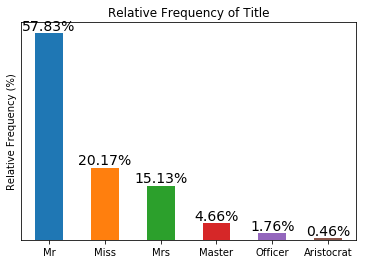

Absolute & Relative Frequency of Title :


,Absolute Frequency,Relative Frequency(%)
Mr,757,57.83
Miss,264,20.17
Mrs,198,15.13
Master,61,4.66
Officer,23,1.76
Aristocrat,6,0.46


In [61]:
'''Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.'''
merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

'''Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.'''
merged.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

'''After processing, visualise and count absolute and relative frequency of transformed Title.'''
absolute_and_relative_freq(merged.Title)

**Temuan**: Hampir 58% penumpang memiliki gelar Mr (laki-laki tentu saja), diikuti oleh lebih dari 20% penumpang memiliki gelar Miss (wanita yang tidak menikah maka biasanya lebih muda dari Mrs). Lebih dari 15% penumpang adalah wanita yang sudah menikah (Mrs).

#### 5.1.3 Sibb dan Parch

Dalam analisis univariat, kami melihat beberapa penumpang memiliki saudara / pasangan dan beberapa tidak punya. Hal yang sama juga berlaku untuk Varich Parch. Karena kedua variabel ini bersama-sama menunjukkan ukuran keluarga, kami akan membuat variabel baru 'Family_size' dari dua variabel ini.

In [65]:
'''Merge SibSp and Parch to create a variable Family_size.'''
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
display(merged.Family_size.value_counts())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

Kami melihat ada beberapa ukuran keluarga dengan frekuensi paling sedikit. Jadi, masuk akal untuk menempatkan mereka dalam ember yang lebih sedikit. Kami akan membuat 4 ember yaitu single, small, medium, dan large untuk sisanya.

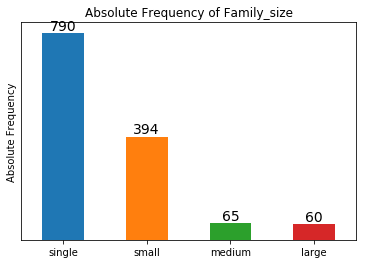

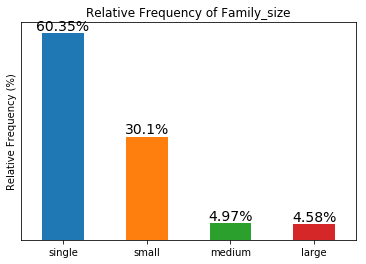

Absolute & Relative Frequency of Family_size :


,Absolute Frequency,Relative Frequency(%)
single,790,60.35
small,394,30.10
medium,65,4.97
large,60,4.58


In [68]:
'''Create buckets of single, small, medium, and large and then put respective values into them.'''
merged.Family_size.replace(to_replace = [1], value = 'single', inplace = True)
merged.Family_size.replace(to_replace = [2,3], value = 'small', inplace = True)
merged.Family_size.replace(to_replace = [4,5], value = 'medium', inplace = True)
merged.Family_size.replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

'''After processing, visualise and count the absolute and relative frequency of engineered Family_size.'''
absolute_and_relative_freq(merged.Family_size)

**Temuan**: Sepertinya sebagian besar penumpang (lebih dari 60%) adalah single (tanpa keluarga), diikuti oleh 30% penumpang memiliki keluarga kecil. Hampir 5% penumpang memiliki keluarga menengah dan lebih dari 4,5% penumpang memiliki keluarga besar besar.

#### 5.1.4 Tiket

In [69]:
display(merged.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Tiket juga merupakan jenis variabel alfanumerik. Kami akan membuat dua grup-satu hanya akan berisi nomor dan lainnya hanya akan berisi karakter yang diekstraksi dari string. Jika baris berisi karakter dan angka, kami hanya akan menyimpan karakter.

In [70]:
'''Assign N if there is only number and no character. If there is a character, extract the character only.'''
ticket = []
for x in list(merged.Ticket):
    if x.isdigit(): #Cek angka
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0]) #Menghapus karakter hubung
        
'''Swap values'''
merged.Ticket = ticket

'''Count the categories in Ticket.'''
bold('**Categories of Ticket:**')
display(merged.Ticket.value_counts())

**Categories of Ticket:**

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
STONO2       7
SOPP         7
SCParis      5
SCAH         5
LINE         4
WEP          4
PP           4
FC           3
SOTONO2      3
SCA4         2
SWPP         2
SC           2
PPP          2
CASOTON      1
Fa           1
AQ3          1
AS           1
AQ4          1
STONOQ       1
A            1
LP           1
SCA3         1
SP           1
SOP          1
SCOW         1
Name: Ticket, dtype: int64

Masih ada terlalu banyak kategori untuk ditangani. Mari kita hanya menyimpan karakter pertama dari Tiket untuk semakin mengurangi kelas Tiket.

N    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

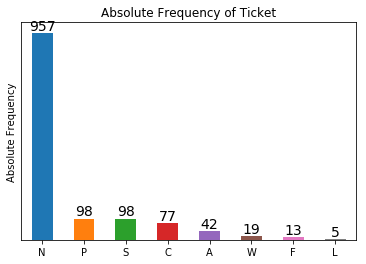

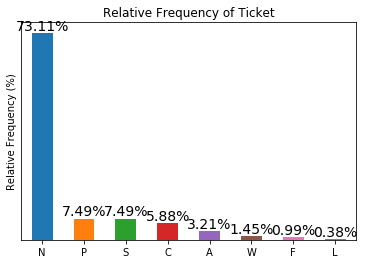

Absolute & Relative Frequency of Ticket :


,Absolute Frequency,Relative Frequency(%)
N,957,73.11
P,98,7.49
S,98,7.49
C,77,5.88
A,42,3.21
W,19,1.45
F,13,0.99
L,5,0.38


In [71]:
'''Keep only the 1st character of Ticket to further reduce the Ticket categories.'''
merged.Ticket = merged.Ticket.apply(lambda x : x[0])
display(merged.Ticket.value_counts())

'''After processing, visualise and count the absolute and relative frequency of updated Ticket.'''
absolute_and_relative_freq(merged.Ticket)

**Temuan**: Lebih dari 73% penumpang memiliki tiket kategori N, diikuti oleh hampir 7,5% kategori penumpang tiket adalah S dan P. Penumpang dengan kategori tiket W serendah 1,45%.

### 6. Outliers Detection

**Bagaimana Outliers memengaruhi distribusi**: Jika nilai suatu variabel secara signifikan di atas rentang yang diharapkan, maka akan menyeret distribusi ke kanan, membuat grafik condong kanan atau condong positif (seperti Fare). Sebagai alternatif, Jika nilai secara signifikan di bawah kisaran yang diharapkan, maka akan menyeret distribusi ke kiri, membuat grafik condong ke kiri atau condong negatif.

Plot lain yang berguna untuk memvisualisasikan variabel kontinu adalah box-plot. Box-plot sangat membantu untuk memahami penyebaran data kontinu dan apakah ada potensi pengamatan yang tidak biasa (Outliers) dalam variabel itu. Ini menyajikan informasi min, kuartil 1, kuartil ke-2 (median), kuartil ke-3, dan maks variabel. **Kami akan menggunakan metode IQR untuk mendeteksi pencilan untuk Variabel Usia dan Tarif meskipun kami tidak akan menghapusnya.**

In [72]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Hitung batas atas dan batas bawah Outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    # Gives space between two subplots
    fig.subplots_adjust(hspace = 1) 
    
    # Plot variable with outliers
    variable.plot.box(vert = False, color = 'coral', grid = False, ax = ax1, title = 'Distribution with Outliers for %s' %variable.name)

    # Plot variable without outliers
    filtered.plot.box(vert = False, color = 'coral', grid = False, ax = ax2, title = 'Distribution without Outliers for %s' %variable.name)

#### 6.1 Deteksi Outlier Age

Total Outliers of Age : 9


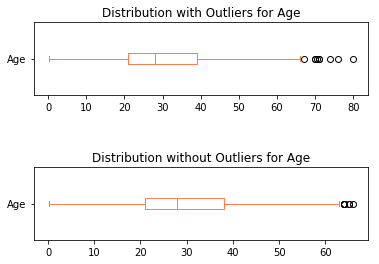

In [74]:
outliers(merged.Age)

**Kami menghitung 9 outlier tetapi boxplot menunjukkan 7 karena 70 dan 71 memiliki duplikat.**

Untuk box-plot, jika bagian yang lebih panjang dari kotak itu kana (atau di atas) median, data dikatakan condong ke kanan. Jika bagian yang lebih panjang tersisa (atau di bawah) ke median, datanya condong ke kiri. Dalam kasus kami, bagian kotak yang lebih besar adalah tepat untuk median

#### 6.2 Deteksi Outlier Fare

Total Outliers of Fare : 171


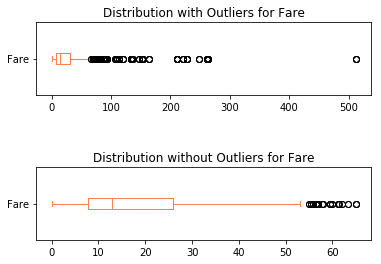

In [75]:
outliers(merged.Fare)

### 7. Memasukkan Variabel kosong/hilang

Cara paling sederhana untuk menambahkan nilai-nilai yang hilang dari suatu variabel adalah dengan mengaitkan nilai-nilai yang hilang dengan mean, median atau modus tergantung pada distribusi dan jenis variabel (kategorikal atau numerik). Sekarang, kita harus memiliki gagasan yang baik tentang distribusi variabel dan keberadaan outliers dalam variabel-variabel tersebut. Untuk variabel kategori **imputasi-Modus** dilakukan dan untuk variabel Numerik **imputasi-Mean** dilakukan jika distribusinya simetris (atau hampir simetris atau normal seperti Age). Di sisi lain, untuk variabel dengan distribusi skewed dan outliers (seperti Fare), **imputasi-median** direkomendasikan karena median lebih kebal terhadap outlier daripada mean.

Namun, salah satu kerugian yang jelas menggunakan mean, median atau modus untuk impute nilai yang hilang adalah penambahan bias jika jumlah nilai yang hilang adalah signifikan (seperti Age). Jadi hanya mengganti mereka dengan mean atau median umur mungkin bukan solusi terbaik karena Age mungkin berbeda berdasarkan kelompok dan kategori penumpang.

Untuk mengatasi hal ini, kita dapat mengelompokkan data kami dengan beberapa variabel yang tidak memiliki nilai yang hilang dan untuk setiap bagian menghitung usia median untuk menghitung nilai yang hilang. Atau kita dapat membangun model regresi linier yang akan memprediksi nilai-nilai Age yang hilang menggunakan fitur-fitur yang tidak memiliki nilai yang hilang. Kedua metode ini dapat menghasilkan akurasi yang lebih baik tanpa bias yang tinggi, kecuali jika nilai yang hilang diharapkan memiliki varians yang sangat tinggi. Kami akan menunjukkan metode imputasi sebelumnya.

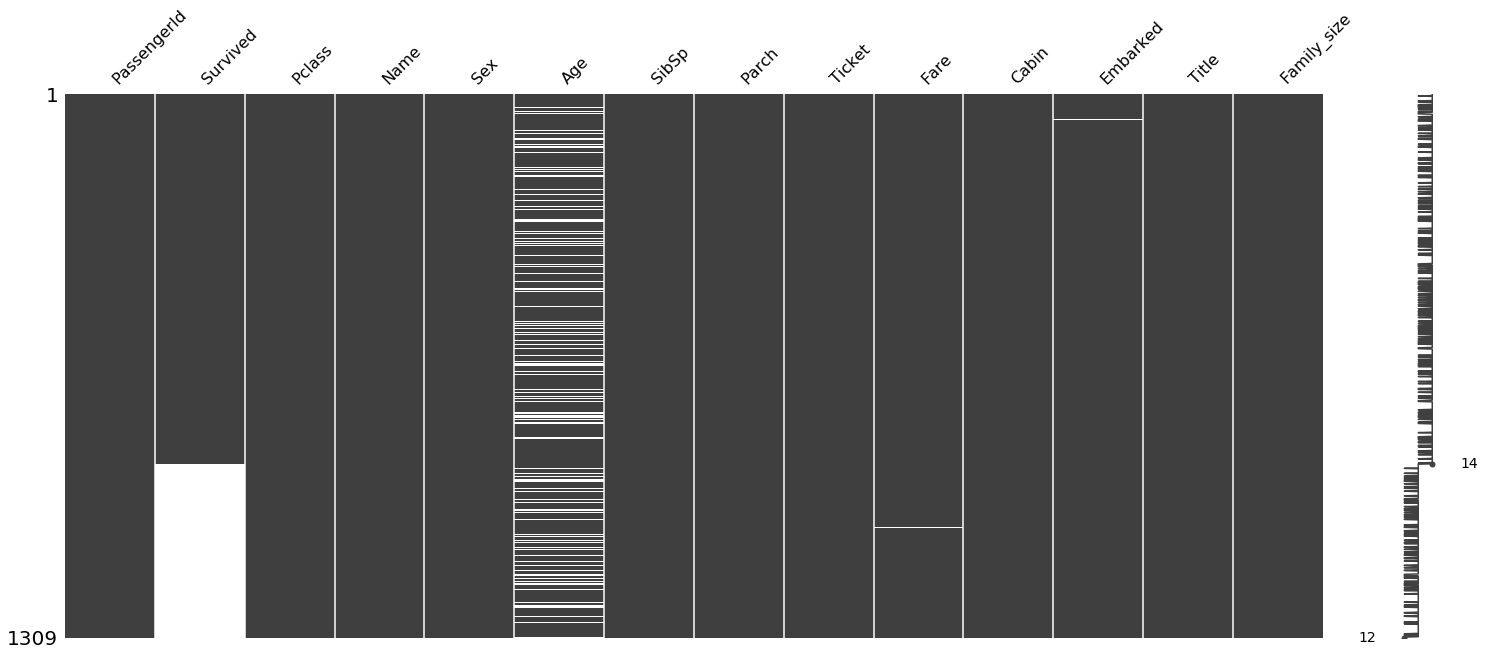

In [77]:
mn.matrix(merged)
plt.show()

In [78]:
"""Let's count the missing values for each variable."""
bold('**Missing values for each variable:**')
display(merged.isnull().sum())

**Missing values for each variable:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

**Temuan:**

1. Age memiliki 263 nilai yang hilang.
2. Fare hanya 1.
3. Cabin memiliki 1014 nilai yang hilang.
4. Embarked hanya memiliki 2 nilai yang hilang.
5. Akhirnya Survived telah kehilangan nilai-nilai (karena gabungan Train dan Test) bahwa kita akan memprediksi learning dari set Train.

Ingat, kami memiliki total 1309 observasi kecuali Bertahan Hidup.

#### 7.1 Impute Fare dan Embarked

In [81]:
'''Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent.'''
merged.Embarked.fillna(value = 'S', inplace = True)

'''Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged.Fare.fillna(value = merged.Fare.median(), inplace = True)

#### 7.2 Impute Age

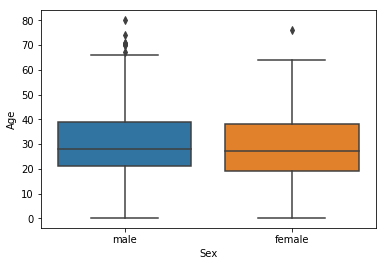

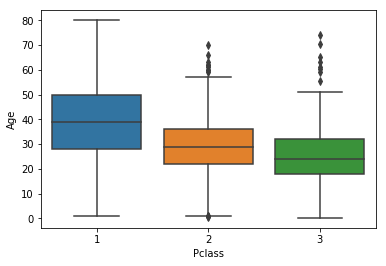

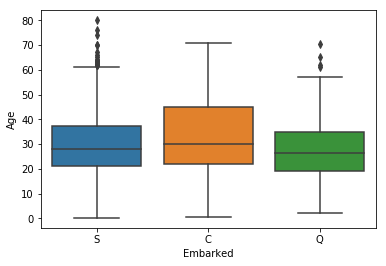

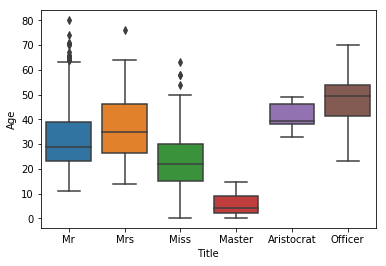

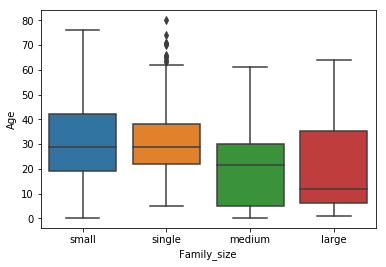

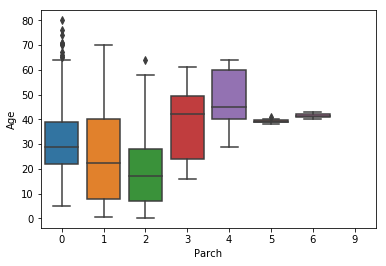

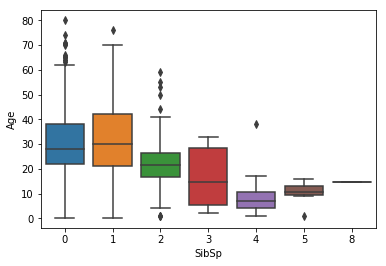

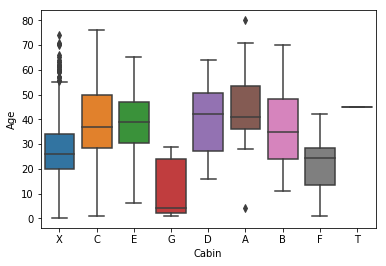

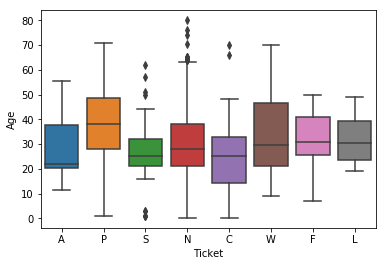

In [82]:
"""Create a boxplot to view the variables correlated with Age. First take the variables we're interested in."""
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
for columns in correlation:
    plt.figure(columns)
    sns.boxplot(x = columns, y = merged.Age, data = correlation)


**Temuan:**

1. Distribusi Age tampaknya sama pada subpopulasi pria dan wanita dan sub-populasi S, C, Q dari Embarked. Jadi Sex and Embarked bukanlah prediktor yang baik untuk Age.
2. Di sisi lain, distribusi Umur tampaknya berbeda dalam 1, 2 dan 3 sub-populasi Pclass, jadi Pclass cukup informatif untuk memprediksi Umur.
3. Akhirnya, distribusi usia tampaknya berbeda dalam kategori yang berbeda untuk Title, Family_size, SibSp, Parch, dan Cabin. Jadi mereka mungkin menjadi prediktor yang baik untuk Age.

In [86]:
"""Mari kita plot peta panas korelasi untuk melihat variabel mana yang sangat berkorelasi dengan Umur dan jika interpretasi kotak kita benar. Kita perlu mengubah variabel kategori menjadi numerik ke plot heatmap korelasi. Jadi mengonversi variabel kategori menjadi numerik."""
from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = merged.Age # Inserting Age in dataframe correlation
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

'''Tabel heatmap correlation'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Age')
plt.show()

ValueError: cannot reindex from a duplicate axis

**Temuan**: Seperti yang diharapkan Sex, Embarked, dan Ticket memiliki korelasi terlemah dengan Age yang bisa kita tebak sebelumnya dari boxplot. Parch dan Family_size cukup berkorelasi dengan Age. Title, Pclass, Cabin, dan SibSp memiliki korelasi tertinggi dengan Age. Tapi kita akan menggunakan Title dan Pclass hanya untuk menandakan Usia karena mereka memiliki korelasi kuat dengan Usia. Jadi, taktiknya adalah untuk menyisipkan nilai-nilai yang hilang dari Usia dengan usia rata-rata baris yang sama menurut Title dan Pclass.

In [87]:
'''Impute Age with median of respective columns (Title and Pclass).'''
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

'''So by now we should have no variables with missing values.'''
bold('**Missing values after imputation:**')
display(merged.isnull().sum())

**Missing values after imputation:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Family_size      0
dtype: int64